In [16]:
from model_utils import *
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    validation_curve,
)
from sklearn import preprocessing

## Import Data
### Data used for preliminary results are downsampled and balanced

In [2]:
# import dataset
test_data = "dataset/test.csv"
df_test = pd.read_csv(test_data, sep=",", index_col="ID_code")

train_data = "dataset/train.csv"
df_train = pd.read_csv(train_data, sep=",", index_col="ID_code")

# Separate majority and minority classes
df2_majority = df_train[df_train["target"] == 0]
df2_minority = df_train[df_train["target"] == 1]
n_samples = df2_minority.target.sum()

df2_majority_downsampled = resample(
   df2_majority, replace=False, n_samples=n_samples, random_state=99
)
df_downsampled = pd.concat([df2_majority_downsampled, df2_minority])
X_dn = df_downsampled.drop(["target"], axis=1)
y_dn = df_downsampled["target"]

# calculatig the z-score normalization using sklearn
std_scale = preprocessing.StandardScaler().fit(df_train.drop(["target"], axis=1).values)
X_dn_norm = std_scale.transform(X_dn)

#use all downsamples samples (40 000)
X_train, X_test, y_train, y_test = train_test_split(X_dn_norm, y_dn, test_size=0.2, random_state=101)

#reduce size of for cbomputationally intensive algorithms
X_trainsmall, _, y_trainsmall, _ = train_test_split(X_train, y_train, test_size=0.8756096, random_state=101)

## Benchmark Logistic Regression

Model #1
 Best f1_macro: 0.7776
Best params: {'C': 1.6647174750581703e-05, 'solver': 'saga'}

Model #2
 Best f1_macro: 0.7776
Best params: {'C': 1.6647174750581703e-05, 'solver': 'saga'}

Model #3
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #4
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #5
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #6
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #7
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #8
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #9
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #10
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #11
 Best f1_macro: 0.7784
Best params: {'C': 0.0001823906227

C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #16
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #17
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #18
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #19
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #20
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #21
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #22
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #23
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #24
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #25
 Best f1_macro: 0.7784
Best params: {'C': 0.00018239062272172374, 'solver': 'sag'}

Model #26
 Best f1_macro: 0.7784
Best params: {'C': 0.000182

C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


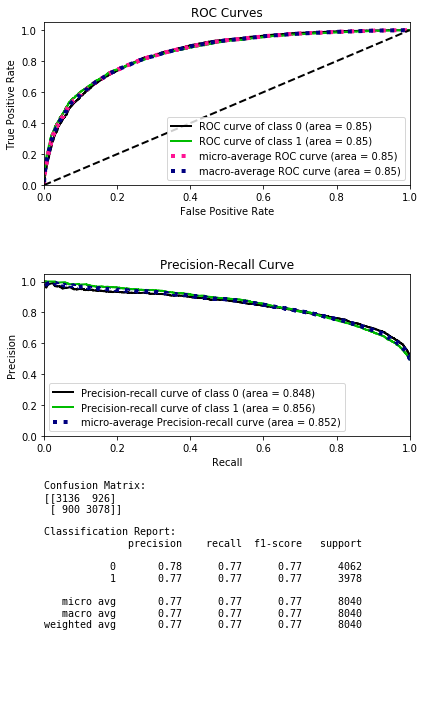

In [46]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=111, penalty='l2')
search_params={
    "C": (1e-6, 10, "log-uniform"),
    "solver": ('liblinear', 'sag', 'saga'),
}

cv_obj = cross_validate_model(
    X_train,
    y_train,
    clf,
    search_spaces=search_params,
    scoring="f1_macro",
    n_iter=50,
    n_folds=10,
)

# get the best estimator from cross validation
model = cv_obj.best_estimator_
model.fit(X_train, y_train)
print(model)

#    from sklearn.externals import joblib
#    # Output a pickle file for the model
#    joblib.dump(model, 'saved_model.pkl') 
#     
#    # Load the pickle file
#    clf_load = joblib.load('saved_model.pkl')


# bench mark the model    
stats_fig, report = benchmark_model_performance(model, X_test, y_test)
stats_fig.savefig(os.path.join('preliminary-logregression-downsampled_f1score.png'), dpi=300, format='png')
stats_fig.show()


## Benchmark Naive Bayes

Model #1
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #2
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #3
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #4
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #5
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #6
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #7
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #8
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #9
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #10
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

Model #11
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #12
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #13
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #14
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #15
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #16
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #17
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #18
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #19
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #20
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #21
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #22
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #23
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #24
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #25
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #26
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #27
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #28
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #29
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #30
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #31
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #32
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #33
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #34
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #35
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #36
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #37
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #38
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #39
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #40
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #41
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #42
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #43
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #44
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #45
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #46
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #47
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #48
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #49
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #50
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #51
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #52
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #53
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #54
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #55
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #56
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #57
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #58
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #59
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #60
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #61
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #62
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #63
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #64
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #65
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #66
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #67
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #68
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #69
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #70
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #71
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #72
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #73
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #74
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #75
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #76
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #77
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #78
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #79
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #80
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #81
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #82
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #83
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #84
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #85
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #86
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #87
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #88
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #89
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #90
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #91
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #92
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #93
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #94
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #95
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #96
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #97
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #98
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #99
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}



C:\Users\Adam\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Model #100
 Best roc_auc: 0.8868
Best params: {'var_smoothing': 7.453943540948982e-11}

GaussianNB(priors=None, var_smoothing=7.453943540948982e-11)


C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


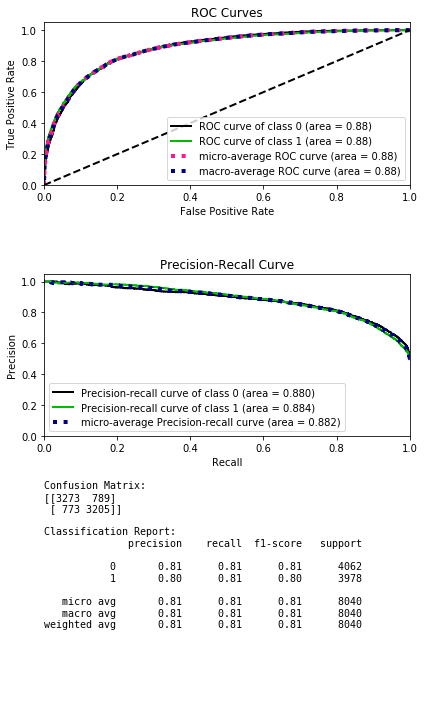

In [45]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
search_params={
    "var_smoothing": (1e-11, 1e-6, "log-uniform"),
}

cv_obj = cross_validate_model(
    X_train,
    y_train,
    clf,
    search_spaces=search_params,
    scoring="roc_auc",
    n_iter=100,
    n_folds=10,
)

# get the best estimator from cross validation
model = cv_obj.best_estimator_
model.fit(X_train, y_train)
print(model)

#    from sklearn.externals import joblib
#    # Output a pickle file for the model
#    joblib.dump(model, 'saved_model.pkl') 
#     
#    # Load the pickle file
#    clf_load = joblib.load('saved_model.pkl')


# bench mark the model    
stats_fig, report = benchmark_model_performance(model, X_test, y_test)
stats_fig.savefig(os.path.join('preliminary-naivebayes-downsampled.png'), dpi=300, format='png')
stats_fig.show()


## Benchmark XGBoost

In [7]:
import xgboost as xgb

clf = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        learning_rate=0.1,
        silent=1,
        early_stopping=200,
        n_estimators=500,
        tree_method="approx",
    )

search_params={
    "min_child_weight": (15, 20),
    "max_depth": (6, 8),
    "max_delta_step": (0, 20),
    "subsample": (0.01, 1.0, "uniform"),
    "colsample_bytree": (0.01, 1.0, "uniform"),
    "colsample_bylevel": (0.01, 1.0, "uniform"),
    "reg_lambda": (1e-2, 1000, "log-uniform"),
    "reg_alpha": (1e-2, 1.0, "log-uniform"),
    "gamma": (1e-2, 0.5, "log-uniform"),
    "min_child_weight": (0, 20),
    "scale_pos_weight": (1e-6, 500, "log-uniform"),
}

cv_obj = cross_validate_model(
    X_trainsmall,
    y_trainsmall,
    clf,
    search_spaces=search_params,
    scoring="roc_auc",
    n_iter=50,
    n_folds=10,
)

# get the best estimator from cross validation
model = cv_obj.best_estimator_
model.fit(X_train, y_train)
print(model)

#    from sklearn.externals import joblib
#    # Output a pickle file for the model
#    joblib.dump(model, 'saved_model.pkl') 
#     
#    # Load the pickle file
#    clf_load = joblib.load('saved_model.pkl')


# bench mark the model    
stats_fig, report = benchmark_model_performance(model, X_test, y_test)
stats_fig.savefig(os.path.join('preliminary-xgboost-downsampled.png'), dpi=300, format='png')
stats_fig.show()


ModuleNotFoundError: No module named 'xgboost'

## Benchmark LightGBM

In [3]:
import lightgbm as lgb

clf = lgb.LGBMRegressor(
        objective='binary',
        metric='auc',
        tree_method='approx',
        learning_rate = 0.1,
        silent=1,
        n_estimators= 7000,
        verbose=0
    )

search_params = {
    'max_delta_step': (0, 20),
    'max_depth': (3, 15),
    'max_delta_step': (0, 20),
    'min_child_samples': (0, 50),
    'max_bin': (100, 1000),
    'subsample': (0.01, 1.0, 'uniform'),
    'subsample_freq': (0, 10),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
    'min_child_weight': (10, 20),
    'gamma': (1e-2, 0.5, 'log-uniform'),
    'subsample_for_bin': (100000, 500000),
    'reg_lambda': (1e-4, 1000, 'log-uniform'),
    'reg_alpha': (1e-4, 1.0, 'log-uniform'),
    'scale_pos_weight': (1e-6, 500, 'log-uniform'),
} 

cv_obj = cross_validate_model(
    X_train,
    y_train,
    clf,
    search_spaces=search_params,
    scoring="roc_auc",
    n_iter=50,
    n_folds=10,
)

# get the best estimator from cross validation
model = cv_obj.best_estimator_
model.fit(X_train, y_train)
print(model)

#    from sklearn.externals import joblib
#    # Output a pickle file for the model
#    joblib.dump(model, 'saved_model.pkl') 
#     
#    # Load the pickle file
#    clf_load = joblib.load('saved_model.pkl')


# bench mark the model    
stats_fig, report = benchmark_model_performance(model, X_test, y_test)
stats_fig.savefig(os.path.join('preliminary-xgboost-downsampled.png'), dpi=300, format='png')
stats_fig.show()


Model #1
 Best roc_auc: 0.5729
Best params: {'colsample_bylevel': 0.18273244758535206, 'colsample_bytree': 0.7530295101748936, 'gamma': 0.2941753333970994, 'max_bin': 975, 'max_delta_step': 7, 'max_depth': 4, 'min_child_samples': 27, 'min_child_weight': 11, 'reg_alpha': 0.029394738173342497, 'reg_lambda': 3.9521013253427832, 'scale_pos_weight': 29.069100513684432, 'subsample': 0.023611001936572194, 'subsample_for_bin': 207802, 'subsample_freq': 7}

Model #2
 Best roc_auc: 0.5729
Best params: {'colsample_bylevel': 0.18273244758535206, 'colsample_bytree': 0.7530295101748936, 'gamma': 0.2941753333970994, 'max_bin': 975, 'max_delta_step': 7, 'max_depth': 4, 'min_child_samples': 27, 'min_child_weight': 11, 'reg_alpha': 0.029394738173342497, 'reg_lambda': 3.9521013253427832, 'scale_pos_weight': 29.069100513684432, 'subsample': 0.023611001936572194, 'subsample_for_bin': 207802, 'subsample_freq': 7}

Model #3
 Best roc_auc: 0.5729
Best params: {'colsample_bylevel': 0.18273244758535206, 'colsam

AttributeError: 'LGBMRegressor' object has no attribute 'predict_proba'

In [26]:
cv_obj.best_params_

{'colsample_bylevel': 0.09312368407993966,
 'colsample_bytree': 0.10810984657070448,
 'gamma': 0.01,
 'max_bin': 810,
 'max_delta_step': 10,
 'max_depth': 15,
 'min_child_samples': 42,
 'min_child_weight': 20,
 'reg_alpha': 1.0,
 'reg_lambda': 0.0058576643876571315,
 'scale_pos_weight': 15.668900072795738,
 'subsample': 1.0,
 'subsample_for_bin': 358216,
 'subsample_freq': 2}

In [38]:
params = {'colsample_bylevel': 0.09312368407993966,
 'colsample_bytree': 0.10810984657070448,
 'gamma': 0.01,
 'max_bin': 810,
 'max_delta_step': 10,
 'max_depth': 15,
 'min_child_samples': 42,
 'min_child_weight': 20,
 'reg_alpha': 1.0,
 'reg_lambda': 0.0058576643876571315,
 'scale_pos_weight': 15.668900072795738,
 'subsample': 1.0,
 'subsample_for_bin': 358216,
 'subsample_freq': 2}

clf2 = lgb.LGBMClassifier(
        objective='binary',
        metric='auc',
        tree_method='approx',
        learning_rate = 0.1,
        silent=1,
        n_estimators= 7000,
        verbose=0,
        **params,
    )

model2 = clf2.fit(X_train, y_train)

C:\Users\akulas\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


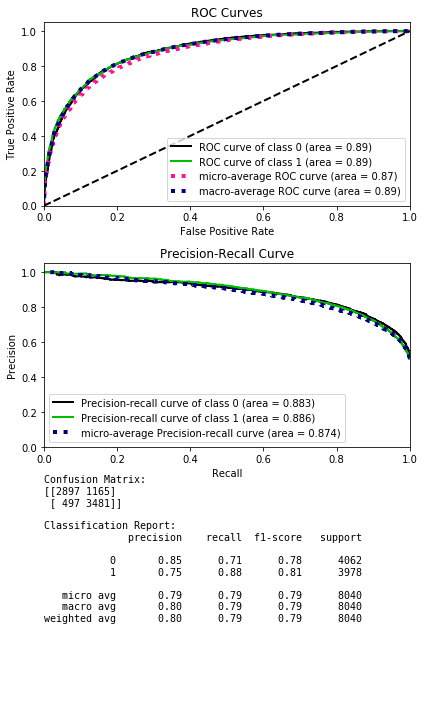

In [39]:
stats_fig, report = benchmark_model_performance(model2, X_test, y_test)
stats_fig.savefig(os.path.join('preliminary-lightGBM-downsampled.png'), dpi=300, format='png')
stats_fig.show()